In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load the dataset
data = pd.read_csv('Mall_Customers.csv')

In [4]:
# display first five records
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# display dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# display the count of null values in each column
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

\\?\C:\Users\nanda\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "\\?\C:\Users\nanda\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\nanda\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nanda\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, e

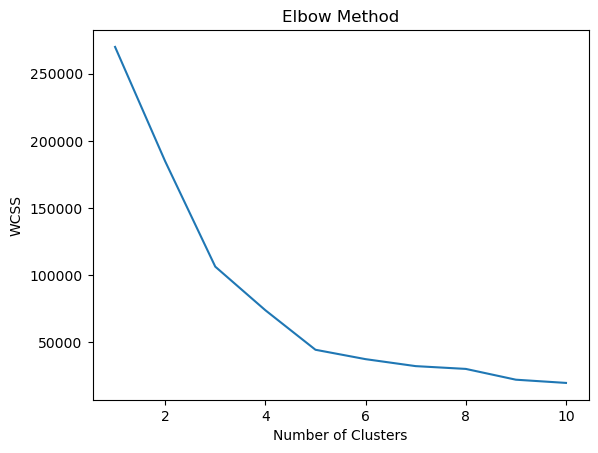

In [7]:
# using Elbow Method to determine optimal number of clusters
from sklearn.cluster import KMeans
# within-cluster sum of squares
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    # using 'Annual Income' and 'Spending Score'
    kmeans.fit(data.iloc[:, 3:])
    wcss.append(kmeans.inertia_)

# plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [8]:
# fitting KMeans to the data with 5 clusters
km = KMeans(n_clusters=5)
km.fit(data.iloc[:, 3:])

\\?\C:\Users\nanda\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [9]:
# predicting cluster labels for each record
y_pred = km.predict(data.iloc[:, 3:])
y_pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [10]:
# adding predicted cluster labels to the dataframe
data["cluster"] = y_pred

In [11]:
# splitting data into clusters for visualization
df0 = data[data["cluster"] == 0]
df1 = data[data["cluster"] == 1]
df2 = data[data["cluster"] == 2]
df3 = data[data["cluster"] == 3]
df4 = data[data["cluster"] == 4]

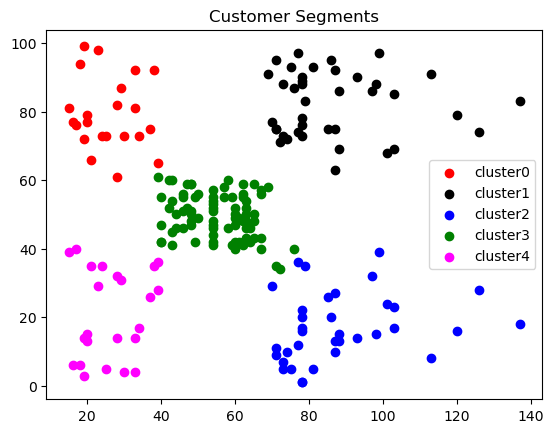

In [12]:
# visualizing customer segments using scatter plot
plt.scatter(df0["Annual Income (k$)"], df0["Spending Score (1-100)"], c="red", label="cluster0")
plt.scatter(df1["Annual Income (k$)"], df1["Spending Score (1-100)"], c="black", label="cluster1")
plt.scatter(df2["Annual Income (k$)"], df2["Spending Score (1-100)"], c="blue", label="cluster2")
plt.scatter(df3["Annual Income (k$)"], df3["Spending Score (1-100)"], c="green", label="cluster3")
plt.scatter(df4["Annual Income (k$)"], df4["Spending Score (1-100)"], c="magenta", label="cluster4")
plt.legend()
plt.title("Customer Segments")
plt.show()